![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/classifiers/toxic_classification.ipynb)

# Toxic text classification with NLU



# 1. Install Java and


In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-04 00:33:01--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-04 00:33:02 (38.1 MB/s) - written to stdout [1671/1671]

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
     |████████████████████████████████| 204.8MB 63kB/s 
     |████████████████████████████████| 153kB 55.2MB/s 
     |████████████████████████████████| 204kB 25.1MB/s 
     |████████████████████████████████| 204kB 56.8MB/s 


# 2. Load toxic model and predict classes for sample string

In [ ]:
import nlu
toxic_pipe  = nlu.load('en.classify.toxic')
toxic_pipe.predict('You are to stupid')

multiclassifierdl_use_toxic download started this may take some time.
Approximate size to download 11.6 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,document,sentence,toxic,origin_index,text,sentence_embedding_tfhub_use,toxic_confidence_confidence
0,You are to stupid,[You are to stupid],"[toxic, insult]",8589934592,You are to stupid,"[[-0.03398505970835686, 0.0007853527786210179,...","[0.968485, 0.968485]"


# 3. Download sample dataset

In [ ]:
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
import pandas as pd
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')


--2021-05-04 00:37:21--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.106.182
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.106.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  47.4MB/s    in 5.6s    

2021-05-04 00:37:27 (43.7 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



# 4. Predict on pandas dataset and visualize predictions



In [ ]:
toxic_pipe  = nlu.load('toxic')
df['text'] = df['comment']
toxic_predictions = toxic_pipe.predict(df['text'].iloc[0:1000], output_level='document')
toxic_predictions

multiclassifierdl_use_toxic download started this may take some time.
Approximate size to download 11.6 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,document,sentence,toxic,origin_index,text,sentence_embedding_tfhub_use,toxic_confidence_confidence
0,NC and NH.,[NC and NH.],NaN,0,NC and NH.,"[-0.06570463627576828, -0.03522052243351936, -...",NaN
1,You do know west teams play against west teams...,[You do know west teams play against west team...,NaN,1,You do know west teams play against west teams...,"[-0.0254225991666317, 0.05448468029499054, -0....",NaN
2,"They were underdogs earlier today, but since G...","[They were underdogs earlier today, but since ...",NaN,2,"They were underdogs earlier today, but since G...","[-0.0035701016895473003, -0.030124755576252937...",NaN
3,"This meme isn't funny none of the ""new york ni...","[This meme isn't funny none of the ""new york n...",NaN,3,"This meme isn't funny none of the ""new york ni...","[0.06464719027280807, -0.023972544819116592, -...",NaN
4,I could use one of those tools.,[I could use one of those tools.],NaN,4,I could use one of those tools.,"[0.028676817193627357, 0.0199710875749588, 0.0...",NaN
...,...,...,...,...,...,...,...
995,Have you bound your pistol on mouse wheel?,[Have you bound your pistol on mouse wheel?],NaN,8589935087,Have you bound your pistol on mouse wheel?,"[-0.04123315587639809, 0.049579471349716187, -...",NaN
996,Imagine showing that to someone a little over ...,[Imagine showing that to someone a little over...,NaN,8589935088,Imagine showing that to someone a little over ...,"[0.0263528935611248, -0.06056991219520569, -0....",NaN
997,I wish Schumer and Reid had not endorsed Keith...,[I wish Schumer and Reid had not endorsed Keit...,NaN,8589935089,I wish Schumer and Reid had not endorsed Keith...,"[0.07649341225624084, 0.05448545515537262, -0....",NaN
998,"yeah, god forbid jesse look out for his fans b...","[yeah, god forbid jesse look out for his fans ...",[toxic],8589935090,"yeah, god forbid jesse look out for his fans b...","[0.049849480390548706, -0.054164644330739975, ...",[0.60551816]


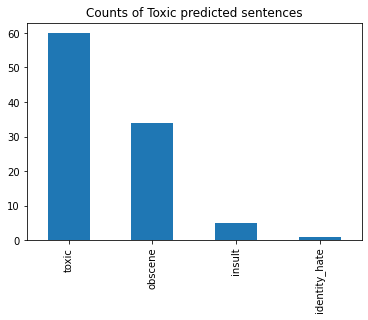

In [ ]:
toxic_predictions.explode('toxic').toxic.value_counts().plot.bar(title='Counts of Toxic predicted sentences')